# CSE5CV/CSE3VIS Assignment 1
Use this notebook to complete the coding portion of the assignment. Once you have finished, you can submit your code by downloading the notebook as a .ipynb file (File > Download > Download .ipynb) and submitting that file on LMS.

In [1]:
# Type your student ID number as an integer here.
# e.g. STUDENT_ID = 22222222
STUDENT_ID = 21374153

Run the cell below to import modules that you are likely to need when completing the assignment.

In [2]:
import math

import cv2
import sklearn.svm
import sklearn.neighbors
import skimage.feature
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay


The code in the cell below will download the CIFAR-10 dataset and create unique dataset for you based on your student ID. After running this cell you will have 3 important variables available to you for use in later tasks:

* `classes`: a list of three strings representing the three class names for your dataset.
* `dataset`: a list of `(img, lbl)` pairs representing examples from your dataset. Each `img` is a $32 \times 32 \times 3$ pixel image, and each `lbl` is an integer indicating the class of the image (0, 1, or 2). You can use `lbl` as an index into `classes` to get the class name as a string.

In [3]:
# Run this cell, but DO NOT MODIFY THE CODE INSIDE.

# Download CIFAR10.
cifar = torchvision.datasets.CIFAR10('./cifar10', download=True)
print()

# Create a unique dataset based on student ID.
rng = np.random.RandomState(seed=STUDENT_ID)
classes = rng.choice(cifar.classes, 3, replace=False).tolist()
print(f'Classes for student ID {STUDENT_ID}:')
print(classes)
dataset = []
for lbl, class_name in enumerate(classes):
    idx = cifar.class_to_idx[class_name]
    example_indices = np.where(np.asarray(cifar.targets) == idx)[0]
    for example_index in example_indices[:1000]:
        dataset.append((np.asarray(cifar[example_index][0]), lbl))
rng.shuffle(dataset)
del cifar

Files already downloaded and verified

Classes for student ID 21374153:
['airplane', 'frog', 'deer']


Run the cell below to preview the first 32 images from your dataset. This will give you an idea of the data that you are working with.

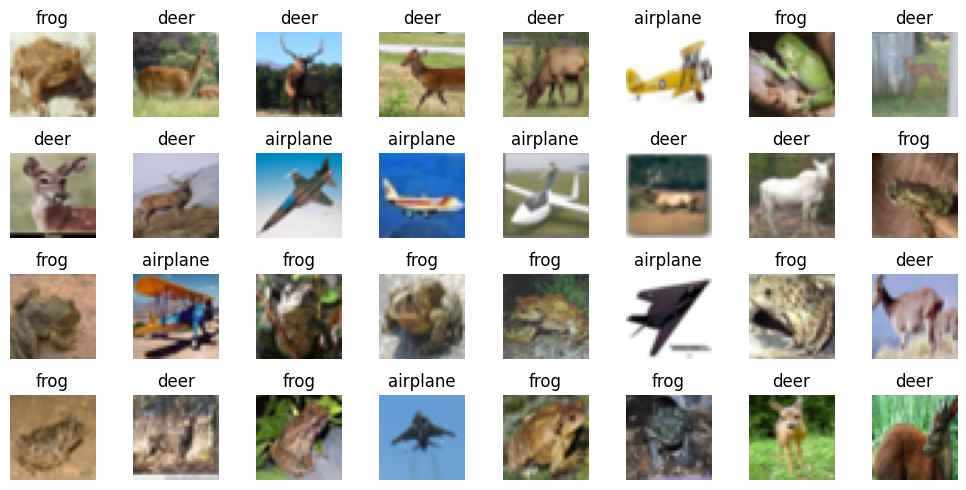

In [4]:
fig = plt.figure(figsize=(10, 5))
for i in range(32):
    img, lbl = dataset[i]

    # Each `lbl` is just an integer. To get the class name, we use the `classes`
    # list.
    img_class = classes[lbl]

    ax = plt.subplot(4, 8, i+1)
    ax.axis('off')
    ax.set_title(img_class)
    ax.imshow(img)
fig.tight_layout()

Now it's your turn to complete the remaining tasks of the assignment by adding code in code cells below. You will find Lab 02 to be a useful reference to have open while working.

You can create additional code cells by clicking the "+ Code" button in the toolbar.

task 2a


In [5]:
for i in range(32):
    img, lbl = dataset[i]
    img_class = classes[lbl]
    means = img.mean(axis=(0,1))
    stds = img.std(axis=(0,1))
    print(f"Image {i+1} ({img_class}):")
    # Format each element in the means array individually
    print(f"Mean: ({', '.join(f'{m:.2f}' for m in means)})")
    print(f"Standard deviation: ({', '.join(f'{m:.2f}' for m in stds)})")
    print('-'*10)

Image 1 (frog):
Mean: (164.42, 145.92, 113.24)
Standard deviation: (49.16, 57.49, 59.00)
----------
Image 2 (deer):
Mean: (128.02, 122.93, 87.44)
Standard deviation: (44.96, 45.65, 32.09)
----------
Image 3 (deer):
Mean: (95.42, 114.93, 121.73)
Standard deviation: (56.30, 78.22, 98.60)
----------
Image 4 (deer):
Mean: (160.71, 151.53, 104.75)
Standard deviation: (39.13, 47.51, 51.67)
----------
Image 5 (deer):
Mean: (123.42, 116.23, 80.48)
Standard deviation: (35.44, 34.27, 23.78)
----------
Image 6 (airplane):
Mean: (228.81, 220.98, 198.32)
Standard deviation: (40.36, 49.77, 82.28)
----------
Image 7 (frog):
Mean: (117.95, 111.33, 81.69)
Standard deviation: (56.08, 58.12, 50.10)
----------
Image 8 (deer):
Mean: (139.73, 147.45, 133.06)
Standard deviation: (30.44, 29.22, 42.23)
----------
Image 9 (deer):
Mean: (138.81, 124.92, 105.44)
Standard deviation: (43.22, 48.27, 41.09)
----------
Image 10 (deer):
Mean: (147.03, 137.68, 138.02)
Standard deviation: (39.73, 48.63, 68.15)
----------

task 2b


In [6]:
stat_names = ['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'correlation']
glcm_features = []
def extract_glcm_features(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    glcm = skimage.feature.graycomatrix(gray_image, distances=distances, angles=angles, levels=levels, symmetric=symmetric, normed=normed)

    contrast = skimage.feature.graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = skimage.feature.graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = skimage.feature.graycoprops(glcm, 'homogeneity')[0, 0]
    asm = skimage.feature.graycoprops(glcm, 'ASM')[0, 0]
    energy = skimage.feature.graycoprops(glcm, 'energy')[0, 0]
    correlation = skimage.feature.graycoprops(glcm, 'correlation')[0, 0]

    return [contrast, dissimilarity, homogeneity, asm, energy, correlation]

for i in range(32):
    img, lbl = dataset[i]
    img_class = classes[lbl]
    features = extract_glcm_features(img, distances=[1, 3, 5], angles=[0, math.pi/2, math.pi])
    glcm_features.append(features)

    print(f"Image {i+1} ({img_class}):")
    print("Contrast:", features[0])
    print("Dissimilarity:", features[1])
    print("Homogeneity:", features[2])
    print("ASM:", features[3])
    print("Energy:", features[4])
    print("Correlation:", features[5])
    print('-'*10)

Image 1 (frog):
Contrast: 372.47278225806883
Dissimilarity: 13.587701612903498
Homogeneity: 0.09792233270136844
ASM: 0.0006579856594693191
Energy: 0.025651231149192804
Correlation: 0.9382841930155341
----------
Image 2 (deer):
Contrast: 276.73689516129326
Dissimilarity: 11.976814516129238
Homogeneity: 0.0969707463309872
ASM: 0.0006732285704994952
Energy: 0.02594664854079415
Correlation: 0.9234633848171155
----------
Image 3 (deer):
Contrast: 331.39818548387325
Dissimilarity: 10.954637096774329
Homogeneity: 0.2490684054992511
ASM: 0.002277799004942801
Energy: 0.04772629259583025
Correlation: 0.9687975337232697
----------
Image 4 (deer):
Contrast: 346.55141129032546
Dissimilarity: 10.44657258064529
Homogeneity: 0.1730138633135454
ASM: 0.0009796110822060708
Energy: 0.03129873930697642
Correlation: 0.9121775015685648
----------
Image 5 (deer):
Contrast: 434.9616935483923
Dissimilarity: 13.774193548387407
Homogeneity: 0.11109651048905612
ASM: 0.00072048159469305
Energy: 0.02684178821712611


task 3


In [7]:
# Assuming 'dataset' contains tuples of (image, label)
features = [item[0] for item in dataset]
labels = [item[1] for item in dataset]

# Split into training and testing sets (80/20 split)
split_index = int(len(features) * 0.8)
train_features = features[:split_index]
train_labels = labels[:split_index]
test_features = features[split_index:]
test_labels = labels[split_index:]

print("Training set size:", len(train_features))
print("Testing set size:", len(test_features))


Training set size: 2400
Testing set size: 600


task 4

In [8]:
lbls = []
for i in range(32):
    img, lbl = dataset[i]
    lbls.append(lbl)
lbls = np.array(lbls)
def classification_accuracy(predictions, lbls):
    return (predictions == lbls).sum()/len(predictions)

bad_predictions = np.zeros(32) # always predict class 0
acc = classification_accuracy(bad_predictions, lbls[:32])
print(f'{acc*100:5.2f}%')

21.88%


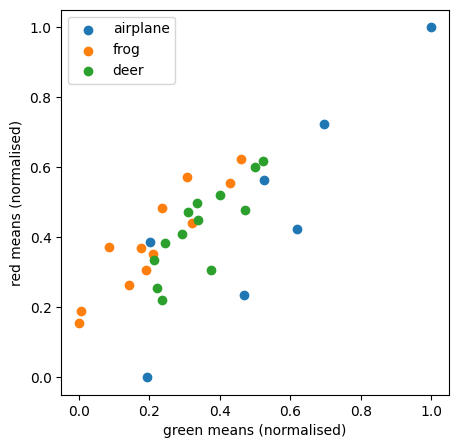

In [9]:
# These arrays will hold parallel lists of features such that
# green_means[i] is the mean green of the i-th image, etc.
green_means = []
blue_means = []
red_means = []
green_stds = []
blue_stds = []
red_stds = []
contrasts = []
dissimilarities = []
homogeneities = []
hogs = []

# Collect all features
for i in range(32):
    img, lbl = dataset[i]
    img = np.array(img)

    # Colour moment features
    r, g, b = img.mean(axis=(0, 1))
    red_means.append(r)
    green_means.append(g)
    blue_means.append(b)
    r, g, b = img.std(axis=(0, 1))
    red_stds.append(r)
    green_stds.append(g)
    blue_stds.append(b)

    # GLCM features
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    cov = skimage.feature.graycomatrix(img_gray, distances=[1, 3, 5], angles=[0, math.pi/2, math.pi])
    contrasts.append(skimage.feature.graycoprops(cov, 'contrast'))
    dissimilarities.append(skimage.feature.graycoprops(cov, 'dissimilarity'))
    homogeneities.append(skimage.feature.graycoprops(cov, 'homogeneity'))

    # HOG features
    hog_f = skimage.feature.hog(img, channel_axis=2)
    hogs.append(hog_f)

# Normalising the features, and converting them all to numpy arrays for ease of use

def normalise(feature):
    feature = np.array(feature)
    return (feature-feature.min())/(feature.max()-feature.min())

green_means = normalise(green_means)
blue_means = normalise(blue_means)
red_means = normalise(red_means)
green_stds = normalise(green_stds)
blue_stds = normalise(blue_stds)
red_stds = normalise(red_stds)

contrasts = normalise(contrasts)
dissimilarities = normalise(dissimilarities)
homogeneities = normalise(homogeneities)

# HOG features are already normalised
hogs = np.array(hogs)

# For the following, there are many features created per image.
# Currently contrasts[i] is the vector of contrast features of image i.
# We want contrasts[i] to be the i-th contrast feature, over all images.
contrasts = contrasts.reshape([32, -1]).transpose()
dissimilarities = dissimilarities.reshape([32, -1]).transpose()
homogeneities = homogeneities.reshape([32, -1]).transpose()
hogs = hogs.transpose()


# Arbitrarily choose green_means and red_means to represent our images for visualisation
plt.figure(figsize=(5, 5))
ax = plt.subplot(1, 1, 1)
for i in range(len(classes)):
    idx = (lbls == i)
    ax.scatter(green_means[idx], red_means[idx], label=classes[i])
ax.legend()
ax.set_xlabel('green means (normalised)')
_ = ax.set_ylabel('red means (normalised)')

In [10]:
features = np.stack ([
    green_means,
    green_stds,
    blue_means,
    blue_stds,
    red_means,
    red_stds,
    *contrasts,
    *dissimilarities,
    *homogeneities,
    *hogs
], axis=-1)
print(features.shape)
print(lbls.shape)

# Train an SVM and get predictions
svm = sklearn.svm.SVC()
svm.fit(features, lbls)
preds = svm.predict(features)

# Evaluate
acc = classification_accuracy(preds, lbls)
print(f'{acc*100:5.2f}%')

(32, 357)
(32,)
96.88%


In [11]:
features = np.stack([
    green_means,
    green_stds,
    blue_means,
    blue_stds,
    red_means,
    red_stds,
    *contrasts,
    *dissimilarities,
    *homogeneities,
    *hogs
], axis=-1)
print(features.shape)
print(lbls.shape)

# Train a KNN and get predictions
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(features, lbls)
preds = knn.predict(features)

# Evaluate
acc = classification_accuracy(preds, lbls)
print(f'{acc*100:5.2f}%')

(32, 357)
(32,)
75.00%


In [12]:
# Prepare features and labels
X = [item[0].flatten() for item in dataset]  # Flatten the images
y = [item[1] for item in dataset]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=STUDENT_ID)

# Train the SVM classifier
svm_clf = SVC(kernel='linear')  # You can experiment with other kernels like 'rbf'
svm_clf.fit(X_train, y_train)

# Train the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=3)  # You can experiment with different k values
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

task 4b

SVM Accuracy: 0.57
KNN Accuracy: 0.62


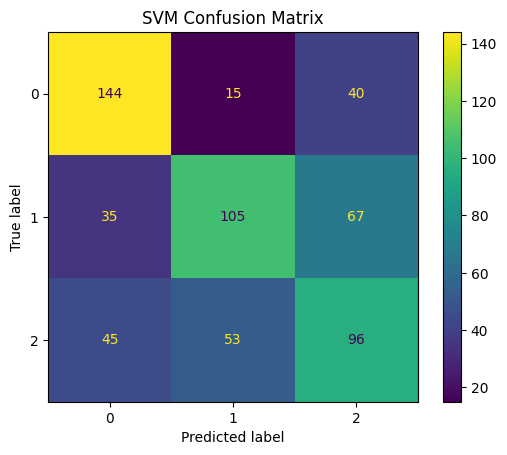

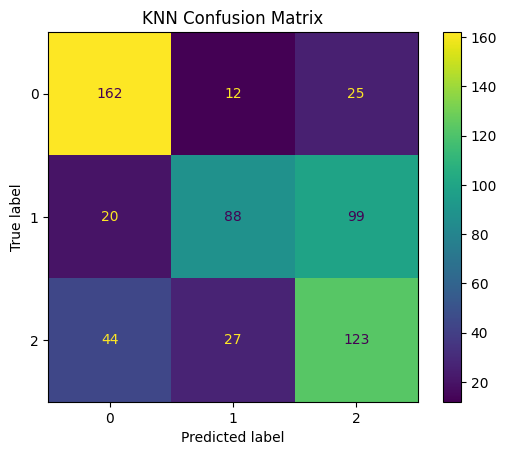

In [13]:
# Make predictions with both classifiers
y_pred_svm = svm_clf.predict(X_test)
y_pred_knn = knn_clf.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"KNN Accuracy: {accuracy_knn:.2f}")


# Display confusion matrices
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.title("SVM Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.title("KNN Confusion Matrix")
plt.show()

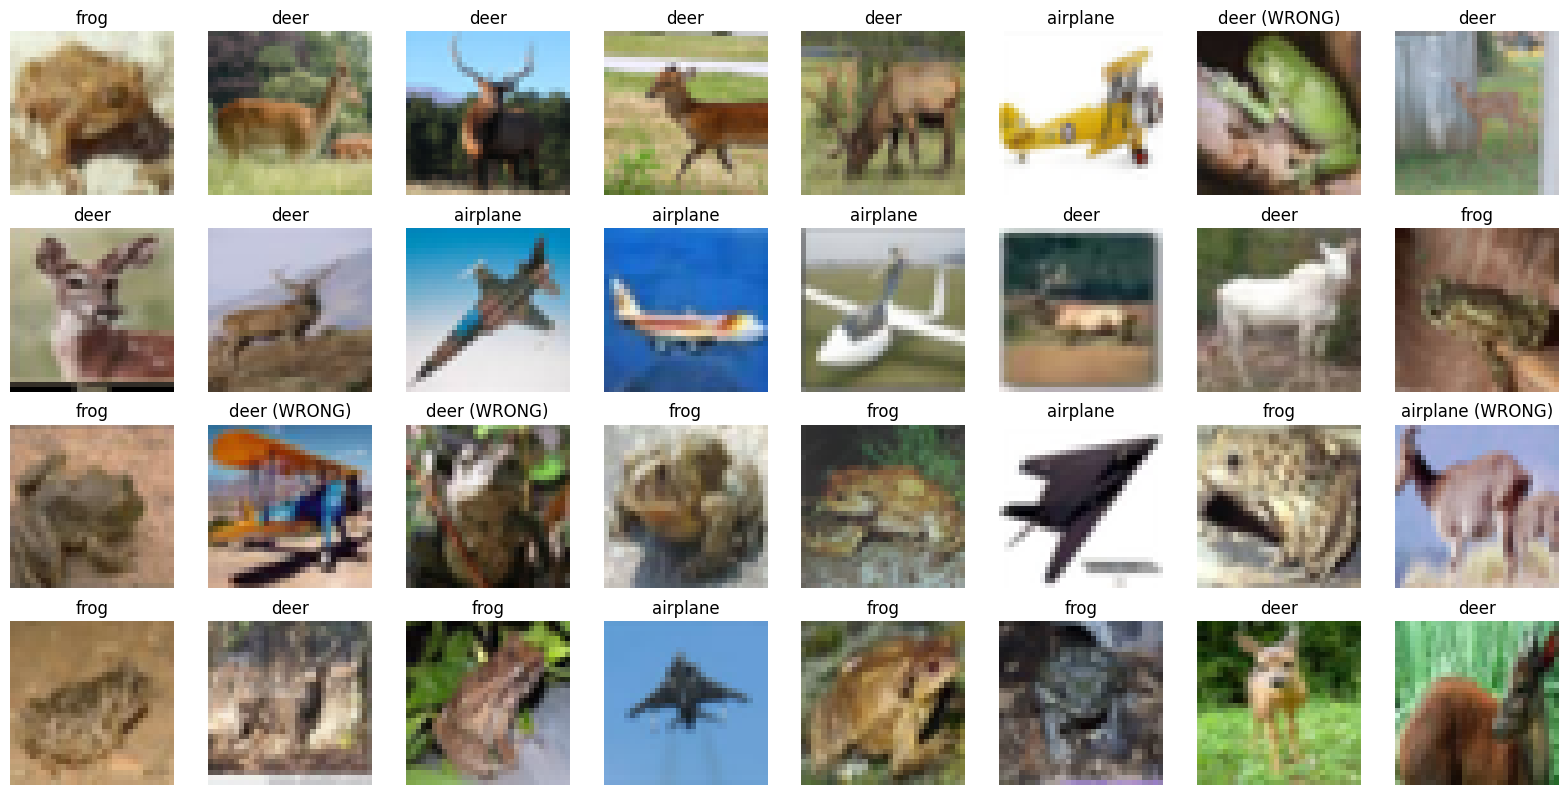

In [14]:
# Here, we will manually inspect the predictions
fig = plt.figure(figsize=(20, 20))
preds = svm_clf.predict(X)
for i in range(32):
    img, lbl = dataset[i]
    img = np.array(img)
    lbl_class = classes[lbl]

    pred = preds[i]
    pred_class = classes[pred]

    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    ax.set_title(pred_class + (' (WRONG)' if pred != lbl else ''))
    ax.imshow(img)

In [15]:
#only color moment features
features_color = np.stack([
    green_means,
    green_stds,
    blue_means,
    blue_stds,
    red_means,
    red_stds
], axis=-1)

# Split into train and test sets
X_train_color, X_test_color, y_train, y_test = train_test_split(
    features_color, lbls, test_size=0.2, random_state=STUDENT_ID
)

# Train SVM and KNN
svm_color = SVC(kernel='linear')
svm_color.fit(X_train_color, y_train)
preds_svm_color = svm_color.predict(X_test_color)

knn_color = KNeighborsClassifier(n_neighbors=3)
knn_color.fit(X_train_color, y_train)
preds_knn_color = knn_color.predict(X_test_color)

# Evaluate
acc_svm_color = classification_accuracy(preds_svm_color, y_test)
acc_knn_color = classification_accuracy(preds_knn_color, y_test)
print("Experiment 1: Color Moment Features Only")
print(f'SVM Accuracy: {acc_svm_color*100:5.2f}%')
print(f'KNN Accuracy: {acc_knn_color*100:5.2f}%')

#only GLCM features
features_glcm = np.stack([
    *contrasts,
    *dissimilarities,
    *homogeneities
], axis=-1)

# Split into train and test sets
X_train_glcm, X_test_glcm, y_train, y_test = train_test_split(
    features_glcm, lbls, test_size=0.2, random_state=STUDENT_ID
)

# Train SVM and KNN
svm_glcm = SVC(kernel='rbf')  # Trying a different kernel
svm_glcm.fit(X_train_glcm, y_train)
preds_svm_glcm = svm_glcm.predict(X_test_glcm)

knn_glcm = KNeighborsClassifier(n_neighbors=5)  # Trying a different k
knn_glcm.fit(X_train_glcm, y_train)
preds_knn_glcm = knn_glcm.predict(X_test_glcm)

# Evaluate
acc_svm_glcm = classification_accuracy(preds_svm_glcm, y_test)
acc_knn_glcm = classification_accuracy(preds_knn_glcm, y_test)
print("\nExperiment 2: GLCM Features Only")
print(f'SVM Accuracy: {acc_svm_glcm*100:5.2f}%')
print(f'KNN Accuracy: {acc_knn_glcm*100:5.2f}%')


Experiment 1: Color Moment Features Only
SVM Accuracy: 28.57%
KNN Accuracy: 42.86%

Experiment 2: GLCM Features Only
SVM Accuracy: 28.57%
KNN Accuracy: 28.57%
